# Homework 5 - Explore Wikipedia's hyperlinks network

## Data handling

In [299]:
import scripts.functionality as funcs
from scripts.graph import Graph, WeightedGraph
import pandas as pd
from collections import defaultdict
from scripts.graph import Graph

In [281]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [282]:
link_dict = funcs.read_graph()
link_df = funcs.read_graph(output='df')
link_dict = defaultdict(set, link_dict)

##### Read Data and save to json

In [283]:
pages_category = funcs.read_pages_category(filename='data/wiki-topcats-categories.txt')
funcs.write_json('data/page_category.json', pages_category)

In [284]:
name_page = funcs.read_name_page(filename='data/wiki-topcats-page-names.txt')
funcs.write_json('data/name_page.json', name_page)

##### Read data from json

In [285]:
# pages_category: Key is the category, and value is a list of integers which is associated to a set of articles
# name_page: Key is an integer that identifies the article. The value associated is the name of the article
pages_category = funcs.read_json('data/page_category.json')
name_page = funcs.read_json_int_key('data/name_page.json')

In [286]:
# Find articles assigned to multiple categories
article_category = funcs.revert_dict_list(pages_category)

In [287]:
# Randomly pick one category for each article
unique_category = funcs.uniformly_pick_article_category(article_category)

In [288]:
# Revert back from articles to categories
final_pages_category = funcs.revert_dict(unique_category)
funcs.write_json('data/final_pages_category.json', final_pages_category)

<br>

## Question 1 ~ Build the graph

As the first step, we build the graph leveraging the custom Graph class we defined:

In [4]:
g = Graph.from_dict(link_dict)

#### Is the graph directed?

The graph is directed, since each node corresponds to a Wikipedia article and each edge corresponds to a web link from an article to another.

#### How many articles are we considering?

The number of articles we are considering is equal to the number of nodes in the graph, that is the number of nodes which appear in our reduced dataset.

In [5]:
print(f'Number of articles:\t{g.n_vertices_}')

Number of articles:	98343


#### How many hyperlinks between pages exist?

The number of hyperlinks between the pages is equal to the number of edges in the graph.

In [6]:
print(f'Number of hyperlinks:\t{g.n_edges_}')

Number of hyperlinks:	483094


#### Compute the average number of links in an arbitrary page

The average number of links in an arbitrary page is simply equal to the fraction of the number of links over the number of vertices.

In [7]:
print(f'Average number of links in an arbitrary page:\t{round(g.n_edges_ / g.n_vertices_,3)}')

Average number of links in an arbitrary page:	4.912


#### What is the graph density? Do you believe that the graph is dense or sparse? Is the graph dense?

The density of a graph is the ratio between the effective number of edges in the graph and the maximum number of possible edges of the graph. That is, let $\mathbf{G}(V, E)$ a directed graph, where $V$ is the set of nodes of the graph and $E$ is the set of edges. Then the density is:

$$D=\frac{|E|}{2{V\choose 2}}=\frac{|E|}{|V|\cdot \left(|V| - 1\right)}$$

A graph is said to be *dense* if $D\approx 1$. Otherwise, it is said *sparse* if $D\approx 0$.

We now compute the density of the our graph.

In [8]:
print(f'Density of the graph:\t{g.density_}')

Density of the graph:	4.995e-05


The magnitude order of the density of the graph is order of 10<sup>-4</sup>, then it is a sparse graph.

#### Visualize the nodes' degree distribution

The nodes' degree distribution shows how many vertices the graph has with degree d. 

For the graph we are analysing, the degree distribution is the following:

In [21]:
g.plot_degree_distro(True)

**TO DO:** There are many outliers (zoom the plot to see them). How to handle them? By reducing the degree interval?

##### Initialize Graph  Class

In [108]:
graph = Graph()

## Question2 ~ Pages reached in given number of clicks

In [10]:
small_graph = Graph()
complete_graph = Graph()

In [11]:
for index, row in link_df.head(50).iterrows():
    small_graph.add_edge(row[0], row[1])

In [12]:
for index, row in link_df.iterrows():
    complete_graph.add_edge(row[0], row[1])

In [13]:
pages_seen = complete_graph.pages_in_click(95, 5)

In [14]:
len(pages_seen)

16726

## Question4 ~ Min Max Cut Algorithm

The logic behind this method is the following:
- Using the max flow algorithm estimate the minimum number of edges required to disconnect the two nodes. 
- The max flow algorithm also provides us with the quickest paths (flows in the max flow notation) that lead us from source to the sink (the two random articles u and v).
- Given that our graph is unweighted and directed, we simply remove the last edges from these flows. 

In [431]:
import random
#random_categories = random.sample(list(final_pages_category.keys()), k=2)

In [432]:
random_articles = set(final_pages_category['Living_people'] + 
                      final_pages_category['American_film_actors'])

In [433]:
induced_subgraph = graph.generate_induced_subgraph(random_articles)

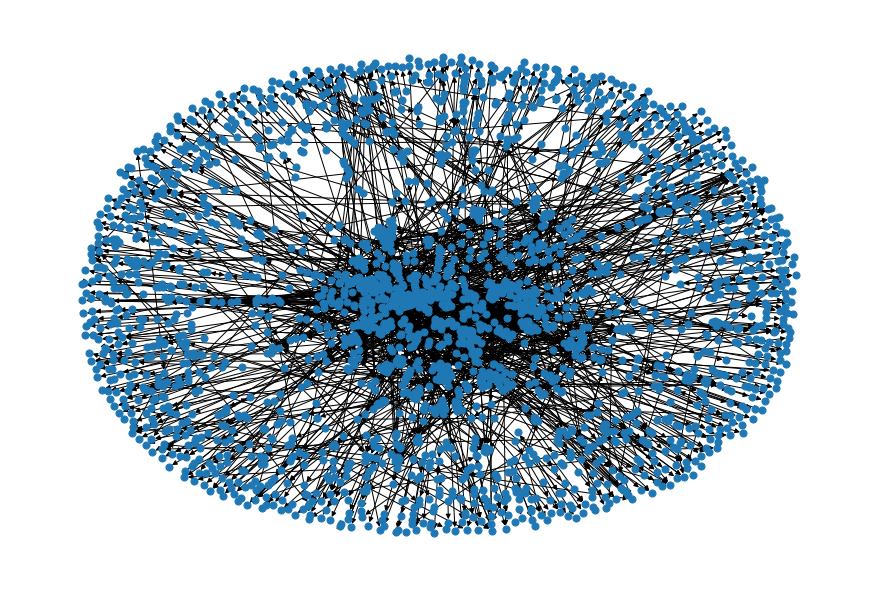

In [434]:
induced_subgraph.plot_graph(with_labels=False, node_size=50)

In [436]:
edges_to_cut = induced_subgraph.max_flow_func(1058079, 1061487)
edges_to_cut

['1061916 --> 1061487', '1060768 --> 1061487']

## Question6 ~ PageRank

In [365]:
graph = Graph.from_dict(link_dict)

In [366]:
#category_graph = graph.category_model_network(unique_category)
category_graph_weighted = graph.category_model_network_weighted(unique_category)

In [379]:
page_rank_score = graph.page_rank(category_graph_weighted, max_iter = 1000, tolerance=.0000001)

Converged in 52 iterations


In [380]:
page_rank_score

{'Living_people': 0.03808348090628192,
 'American_film_actors': 0.03733058811146186,
 'English-language_films': 0.025487367144241397,
 'American_television_actors': 0.022129922539468976,
 'American_films': 0.01936827098095906,
 'Members_of_the_United_Kingdom_Parliament_for_English_constituencies': 0.010431251445665389,
 'Black-and-white_films': 0.009235323624166078,
 'American_stage_actors': 0.008021088760309342,
 'English_footballers': 0.0076106035295755116,
 'The_Football_League_players': 0.0071755480719224085,
 'American_silent_film_actors': 0.00702541126771424,
 'American_voice_actors': 0.005097751567090332,
 'Harvard_University_alumni': 0.005025424803834791,
 'Main_Belt_asteroids': 0.0048572558886416225,
 'Year_of_death_missing': 0.004561264236360634,
 'Year_of_birth_missing': 0.004417668901648497,
 'Major_League_Baseball_pitchers': 0.00413328963617433,
 'Conservative_Party_(UK)_MPs': 0.0037338703271949884,
 'English_football_managers': 0.0033623420224082622,
 'Association_footbal

## Logic of  Page Rank Implementation

In [302]:
dummy_graph = defaultdict(dict)

In [309]:
dummy_graph['B'] = {'C': 1}
dummy_graph['C'] = {'B': 6}
dummy_graph['D'] = {'A': 1, 'B': 4}
dummy_graph['E'] = {'B': 5, 'D': 2, 'F': 3}
dummy_graph['F'] = {'E': 4}

In [304]:
page_rank_graph = WeightedGraph.from_dict(dummy_graph)

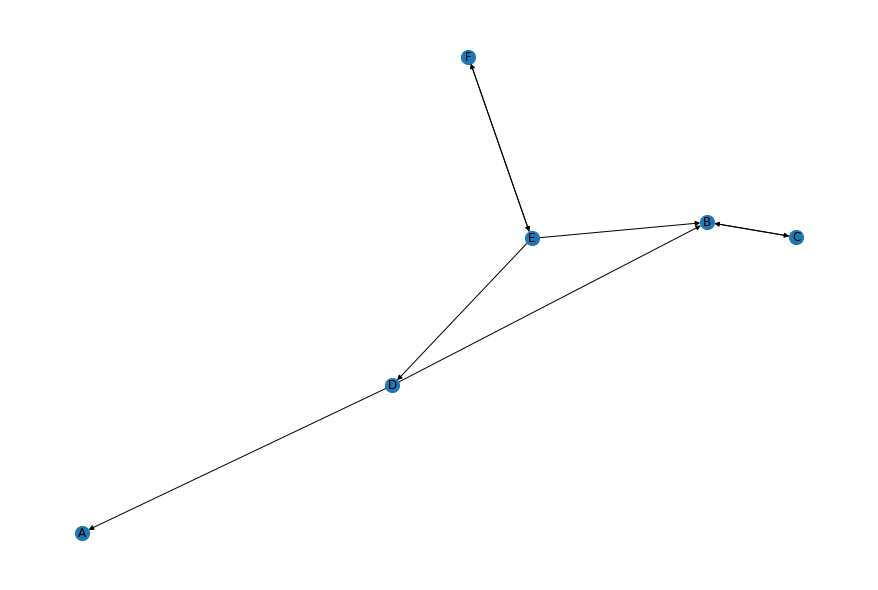

In [382]:
page_rank_graph.plot_graph(node_size=200)

In [310]:
dummy_graph

defaultdict(dict,
            {'B': {'C': 1},
             'C': {'B': 6},
             'D': {'A': 1, 'B': 4},
             'E': {'B': 5, 'D': 2, 'F': 3},
             'F': {'E': 4}})

In [311]:
initial_page_rank_score = {'A' : 1/6, 'B' : 1/6, 'C' : 1/6, 'D' : 1/6, 'E' : 1/6, 'F' : 1/6}

In [318]:
dummy_graph
outlink = {'A': {'D': 1/5},
           'B': {'C': 6/6, 'D': 4/5, 'E': 5/10},
           'C': {'B': 1/1},
           'D': {'E': 2/10},
           'E': {'F': 4/4},
           'F': {'E': 3/10}}

In [324]:
x = {k : v * initial_page_rank_score[k] for k, v in B.items() if k in initial_page_rank_score}

In [330]:
sum(x.values())

0.3833333333333333

In [353]:
N = 6  # number of nodes
lambda_ = .85
page_rank_score_t = {'A' : 1/6, 'B' : 1/6, 'C' : 1/6, 'D' : 1/6, 'E' : 1/6, 'F' : 1/6}
page_rank_score_t_1 = {}
max_iter = 60
i = 0
while i < max_iter:
    i += 1
    print(i)
    for key, value in outlink.items():
        temp = sum({k : v * page_rank_score_t[k] for k, v in outlink[key].items() if k in page_rank_score_t}.values())
        page_rank_score_t_1[key] = ((1-lambda_)/N)  + lambda_*temp
    factor=1/sum(page_rank_score_t_1.values())
    for k in page_rank_score_t_1:
        page_rank_score_t_1[k] = page_rank_score_t_1[k]*factor
        
    diff = np.sqrt(sum((np.array(list(page_rank_score_t.values())) - np.array(list(page_rank_score_t_1.values())))**2))
    
    if diff < 0.001:
        print('Converged')
        break
        
    if i != max_iter:
        page_rank_score_t = page_rank_score_t_1
        page_rank_score_t_1 = {}


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
Converged


In [354]:
page_rank_score_t

{'A': 0.03210119233869339,
 'B': 0.4278498577490391,
 'C': 0.39888024293552077,
 'D': 0.03661928689145861,
 'E': 0.06247113256122751,
 'F': 0.04207828752406076}

In [355]:
page_rank_score_t_1

{'A': 0.032101192338678475,
 'B': 0.42715490748701496,
 'C': 0.39957519319770163,
 'D': 0.03661928689144555,
 'E': 0.06247113256111803,
 'F': 0.04207828752404129}

In [356]:
dummy_graph
outlink = {'A': {'D': 1/5},
           'B': {'C': 6/6, 'D': 4/5, 'E': 5/10},
           'C': {'B': 1/1},
           'D': {'E': 2/10},
           'E': {'F': 4/4},
           'F': {'E': 3/10}}

In [357]:
dummy_graph

defaultdict(dict,
            {'B': {'C': 1},
             'C': {'B': 6},
             'D': {'A': 1, 'B': 4},
             'E': {'B': 5, 'D': 2, 'F': 3},
             'F': {'E': 4}})

In [359]:
# This dictionary represents the probability of  going to a page (key of this dict) from the pages in the values
outlink_dict = defaultdict(dict)
for k, v in dummy_graph.items():
    for i in v:
        try:
            outlink_dict[i][k] = outlink_dict[i][k] + dummy_graph[k][i]/sum(dummy_graph[k].values())
        except:
            outlink_dict[i].update({k: dummy_graph[k][i]/sum(dummy_graph[k].values())})

In [362]:
sorted(outlink_dict)

['A', 'B', 'C', 'D', 'E', 'F']

In [363]:
outlink_dict

defaultdict(dict,
            {'C': {'B': 1.0},
             'B': {'C': 1.0, 'D': 0.8, 'E': 0.5},
             'A': {'D': 0.2},
             'D': {'E': 0.2},
             'F': {'E': 0.3},
             'E': {'F': 1.0}})

In [364]:
{k: 1/N for k, v in outlink.items()}

{'A': 0.16666666666666666,
 'B': 0.16666666666666666,
 'C': 0.16666666666666666,
 'D': 0.16666666666666666,
 'E': 0.16666666666666666,
 'F': 0.16666666666666666}

## Question 4 ~ Logic

In [418]:
Q4_graph = {'source': ['1', '4', '7', '5', '8'], 
           '1': ['sink', '3'],
           '2': ['4', '7', '9'],
           '3': ['6'],
           '4': ['8', '9'],
           '5': ['7', 'sink'],
           '6': ['8'],
           '7': ['9'],
           '8': ['sink'],
           '9': ['sink']}

In [419]:
Q4_graph = Graph.from_dict(Q4_graph)

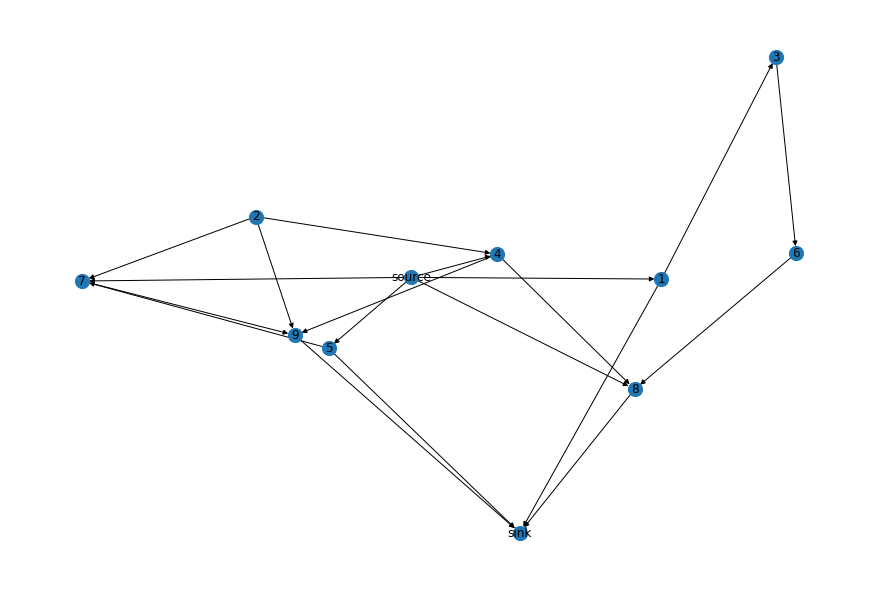

In [420]:
Q4_graph.plot_graph(with_labels=True, node_size=200)

In [421]:
Q4_graph.build_residual_graph_capacity()

In [429]:
edges_to_cut = Q4_graph.max_flow_func('source', 'sink')

In [430]:
edges_to_cut

['1 --> sink', '8 --> sink', '5 --> sink', '9 --> sink']

In [428]:
flow

[['source', '1', 'sink'],
 ['source', '8', 'sink'],
 ['source', '5', 'sink'],
 ['source', '4', '9', 'sink']]

In [411]:
Q4_graph._adj_list

defaultdict(set,
            {'source': {'1', '4', '5', '7', '8'},
             '1': {'3', 'sink'},
             '2': {'4', '7', '9'},
             '3': {'6'},
             '4': {'8', '9'},
             '5': {'7', 'sink'},
             '6': {'8'},
             '7': {'9'},
             '8': {'sink'},
             '9': {'sink'},
             'sink': set()})